# Regression
CMP5101 notes (Tevfik Aytekin)

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
%matplotlib inline

# IMPORTANT: You need to download the following file to your computer from here:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
train = pd.read_csv("../datasets/house_prices/train.csv")

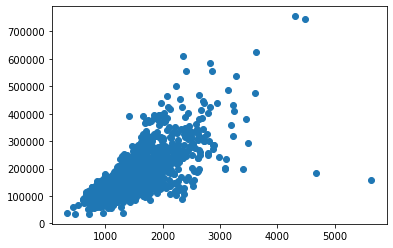

In [137]:
plt.scatter(train.loc[:,"GrLivArea"], train.loc[:,"SalePrice"])

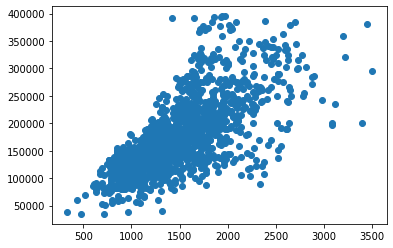

In [138]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
plt.scatter(train2.loc[:,"GrLivArea"], train2.loc[:,"SalePrice"])

(1, 1) (1,)
(1, 1) (1,)


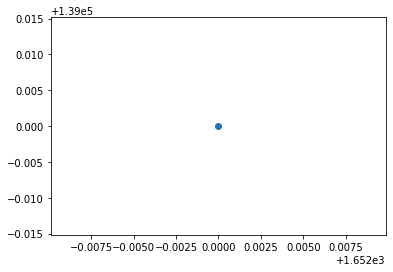

In [208]:
# Take a small sample of the data in order to work with nicer diagrams.
# Make a test / train split

train2 = train2.sample(frac=0.2)
X = train2[['GrLivArea']]
y = train2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

In [140]:
# fit a linear model
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

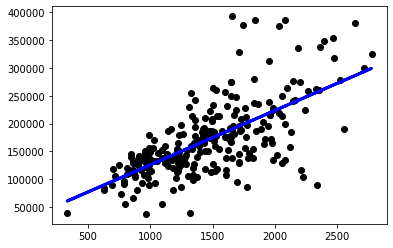

In [141]:
#Plot regression line on training data
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

In [142]:
# Show the intercept and the coefficient of the model (which is a line)
print (model.intercept_)
print (model.coef_)

28380.450979296613
[97.5267759]


#### Can we interpret the above coefficient as increase in price per square feet?

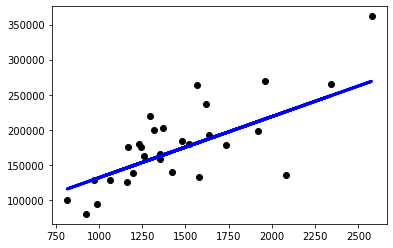

In [23]:
#Plot regression line on test data
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, test_predictions, color='blue', linewidth=3)

In [24]:
# training and test set mean absolute error (MAE)
print("Training MAE:", mean_absolute_error(y_train, train_predictions))
# or
print(np.mean(np.abs(y_train - train_predictions)))

print("Test MAE:", mean_absolute_error(y_test, test_predictions))


Training MAE: 34783.20875208914
34783.20875208915
Test MAE: 30663.322888343566


In [25]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))

Test MAPE: 17.900749145424978


In [26]:
print("r-squared:", model.score(X_test, y_test))

r-squared: 0.5401494875691667


## The Coefficient of Determination, r-squared ($r^2$)

$r^2$, is the percentage of the dependent variable variation that a model explains. What does this mean? Baseline model predicts always the mean value (a horizontal line). We can find the SSE of the baseline model (call it MSSE). Find the SSE of the regression line (call it RSSE). 

$$r^2 = \frac{(MSSE - RSSE)}{MSSE}$$ 

$r^2$ compares the performance of the model with respect to baseline. If it is 0 it means the model performance is as bad as the baseline, if it is 1 it means that the model performance is perfect. 

What is the range of values can $r^2$ take? Can it be a negative value?

More information is [here](https://onlinecourses.science.psu.edu/stat501/node/255/)

$r$ in $r^2$ refers to Pearson's correlation coefficient. Relation between $r$ and $r^2$ is [here](http://www.win-vector.com/blog/2011/11/correlation-and-r-squared/)


In [27]:
# baseline - predict always the mean SalePrice value

mean_sales_price = y_train.mean()
mean_array = np.ones(y_test.size)*mean_sales_price
print("Baseline (mean) MAE:", mean_absolute_error(y_test, mean_array))
print("Baseline (mean) MAPE:", mean_absolute_percentage_error(y_test, mean_array))


Baseline (mean) MAE: 43849.37018650207
Baseline (mean) MAPE: 27.046092486570473


In [28]:
# Scores according to Kaggle challenge metric
from sklearn.metrics import mean_squared_log_error


def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));

print("Test Kaggle-score:", kaggle_score(y_test, test_predictions))
print("Baseline (mean) Kaggle-score:", kaggle_score(y_test,mean_array))


Test Kaggle-score: 0.22050903882606443
Baseline (mean) Kaggle-score: 0.32854415193543235


In [29]:
y1 = y.head(5)
y2 = y1 + 25000;
print("Baseline (mean) Kaggle-score:", kaggle_score(y1,y2))
print("Baseline (mean) MAPE:", mean_absolute_percentage_error(y1,y2))


Baseline (mean) Kaggle-score: 0.1196792404481433
Baseline (mean) MAPE: 12.580128424998405


In [30]:
y1

133     220000
1293    162900
573     170000
665     230500
293     235000
Name: SalePrice, dtype: int64

In [209]:
# Prediction with two input variables

X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']

X.head(5)

,GrLivArea,BedroomAbvGr
0,1710,3
1,1262,3
2,1786,3
3,1717,3
4,2198,4


In [210]:
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['GrLivArea','Bedroom'], model.coef_)).T
print(combined)

Test MAE: 36466.221431239595
Test Kaggle-Score: 0.27146067368096227
Test MAPE: 22.68355466423573
Intercept: 58105.470422622544
[['GrLivArea' '135.3448300970067']
 ['Bedroom' '-28252.12207155305']]


### The coefficient of Bedroom is negative! Does increase in the number of bedrooms negatively effect house price?

In [33]:
# Prediction with only Bedroom

X = train.loc[:,['BedroomAbvGr']]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['Bedroom'], model.coef_)).T
print(combined)

Test MAE: 57937.62829599445
Test Kaggle-Score: 0.4048577846590715
Test MAPE: 35.41850944868678
Intercept: 131532.79924434776
[['Bedroom' '17353.07388247347']]


In [37]:
# Run linear regression with top correlated 10 attributes with SalePrice
cors = train.corr(); 
top10 = cors.loc[:, "SalePrice"].sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((top10, model.coef_)).T
print(combined)


Test MAE: 24038.87709629891
Test Kaggle-Score: 0.2091216504173885
Test MAPE: 14.682856650915504
Intercept: -1182725.2319512274
[['OverallQual' '20214.348025931955']
 ['GrLivArea' '49.21421724064222']
 ['GarageCars' '10632.090527196875']
 ['GarageArea' '19.161678758205284']
 ['TotalBsmtSF' '20.26142693549868']
 ['1stFlrSF' '11.668721495680806']
 ['FullBath' '-7956.665647123']
 ['TotRmsAbvGrd' '531.6086525186206']
 ['YearBuilt' '260.9662697126205']
 ['YearRemodAdd' '301.11077315219245']]


In [78]:

# run linear regression with full data
X = train.loc[:,'MSSubClass':'SaleCondition']
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((X.columns, model.coef_)).T
print(combined)

Test MAE: 19286.70066460349
Test Kaggle-Score: 0.18595448609547416
Test MAPE: 11.09895531631123
Intercept: -347736.41082355194
[['MSSubClass' -50.80332586635776]
 ['LotFrontage' 27.200810384826152]
 ['LotArea' 0.6299867267048]
 ['OverallQual' 5859.740668492756]
 ['OverallCond' 6033.326978736595]
 ['YearBuilt' 290.7678901253073]
 ['YearRemodAdd' 78.55385014419424]
 ['MasVnrArea' 13.75683745785453]
 ['BsmtFinSF1' 15.119569156269392]
 ['BsmtFinSF2' 11.04350714952625]
 ['BsmtUnfSF' -3.078355355409826]
 ['TotalBsmtSF' 23.084709872736312]
 ['1stFlrSF' 23.05757786312006]
 ['2ndFlrSF' 34.695604954367354]
 ['LowQualFinSF' -34.721942942631756]
 ['GrLivArea' 23.03116494891856]
 ['BsmtFullBath' 1214.1038788566657]
 ['BsmtHalfBath' 341.15039939689973]
 ['FullBath' 3334.7911494258933]
 ['HalfBath' 2357.4401122322547]
 ['BedroomAbvGr' -3219.056358542181]
 ['KitchenAbvGr' -16139.52104876028]
 ['TotRmsAbvGrd' 1982.1738168425913]
 ['Fireplaces' 8011.201505772997]
 ['GarageYrBlt' -37.12262988182056]
 ['G

[Dummy encoding](https://github.com/tevfikaytekin/data_science/blob/master/collin_dummy.ipynb)

In [43]:
kaggle_score([100000],[110000])

0.09530927072209217

In [39]:
# Cross validation with a single line
X = X.fillna(X.mean()) #!!! Test data is used in the mean
result = cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv = 5)
print(result)


[-19046.63011546 -18850.54099706 -19965.80441316 -15996.68770613
 -20272.26396749]


### Scaling (or Standardization)

#### min-max scaling

$$
x_i = \frac{x_i - x_{min}}{x_{max}-x_{min}}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $x_{min}$ is the minimum and $x_{max}$ is the maximum value in $x$. 

In [116]:
# create a DataFrame 
df = pd.DataFrame([[100, 1990, 100000],
                  [120, 2002, 150000],
                  [90, 2012, 120000]],
                 index = [5, 10,15],
                 columns = ["area","built","price"])
df

,area,built,price
5,100,1990,100000
10,120,2002,150000
15,90,2012,120000


In [121]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df)
print(scaler.data_max_)
print(scaler.data_min_)

[1.200e+02 2.012e+03 1.500e+05]
[9.00e+01 1.99e+03 1.00e+05]


In [124]:
print(scaler.transform(df))

[[0.33333333 0.         0.        ]
 [1.         0.54545455 1.        ]
 [0.         1.         0.4       ]]


#### Standard scaling

$$
x_i = \frac{x_i - \bar{x}}{s_x}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $\bar{x}$ is the mean of $x$ and $s_x$ is the std of $x$. 

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df)
print(scaler.transform(df))

[[-0.26726124 -1.26012384 -1.13554995]
 [ 1.33630621  0.07412493  1.29777137]
 [-1.06904497  1.18599891 -0.16222142]]


### Example

In [104]:
X = train.loc[:,['LotArea','OverallQual']]
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# test set should be scaled with the scaler trained on the training set.
X_test_scaled = scaler.transform(X_test)

lm = linear_model.LinearRegression()
model = lm.fit(X_train_scaled, y_train)
test_predictions = model.predict(X_test_scaled)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))
print("Test Kaggle-score:", kaggle_score(y_test, np.abs(test_predictions)))
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))
print(X_train_scaled)

Test MAE: 32443.565231072833
Test Kaggle-score: 0.2394546854944217
Test MAPE: 19.92476613368877
[[0.04756559 0.66666667]
 [0.03267561 0.55555556]
 [0.03432226 0.66666667]
 ...
 [0.04827196 0.66666667]
 [0.03238558 0.55555556]
 [0.02938232 0.66666667]]


### Overfitting

(38, 1) (38,)
(5, 1) (5,)


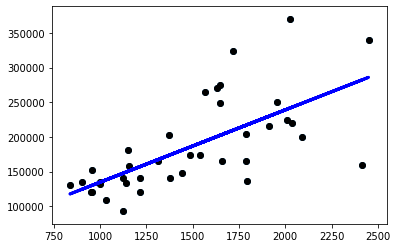

In [105]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
train3 = train2.sample(frac=0.03)
X = train3[['GrLivArea']]
y = train3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

model_slr = linear_model.LinearRegression()
model = model_slr.fit(X_train, y_train)
train_predictions = model_slr.predict(X_train)
test_predictions = model_slr.predict(X_test)

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

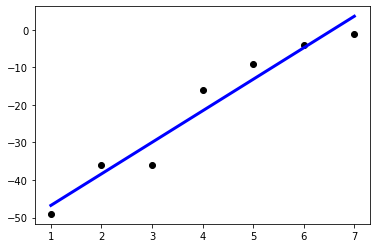

In [106]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)

model = linear_model.LinearRegression()
model = model.fit(X, y)

train_predictions = model.predict(X)

plt.scatter(X, y,  color='black')
plt.plot(X, train_predictions, color='blue', linewidth=3)



[[ 7 49]
 [ 6 36]
 [ 5 25]
 [ 4 16]
 [ 3  9]
 [ 2  4]
 [ 1  1]]
[13.25       -0.60714286]
-62.4285714285714


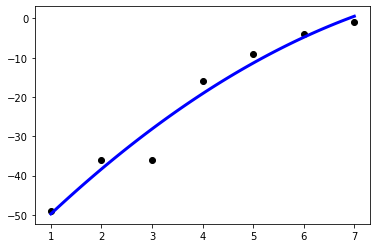

In [233]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2]
model = linear_model.LinearRegression()
model = model.fit(X, y)
X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(X)
print(model.coef_)
print(model.intercept_)

[ 3.92548440e+00  7.13912845e+00  6.47138798e+00 -4.98518482e-01
 -6.85905697e+00  4.26587424e+00 -1.05595717e+00  1.19355760e-01
 -5.11404786e-03]
-62.50258416958344


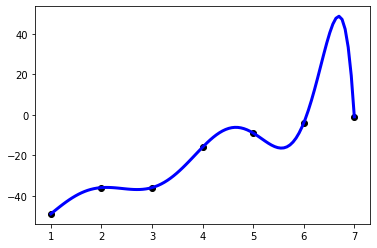

In [234]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.LinearRegression()
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### Ridge Regression

[ 3.07391854e-01  5.77397076e-01  5.77329049e-01  1.04592385e-01
 -4.04882677e-01  2.54198846e-01 -6.78184427e-02  8.18085019e-03
 -3.67851928e-04]
-47.319761762545696


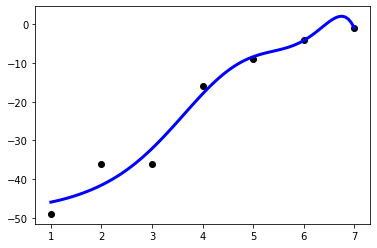

In [109]:
from sklearn.linear_model import Ridge
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.Ridge(alpha=5)
# play with the value of alpha and see its effect.
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### PolynomialFeatures method in Python

In [235]:
from sklearn.preprocessing import PolynomialFeatures
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.fillna(X.mean())
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
print(X);

Test MAE: 35799.82461578491
Test Kaggle-Score: 0.265224461725744
Test MAPE: 21.633375166165706
Intercept: -16785.635930609482
[[1.710000e+03 3.000000e+00 2.924100e+06 5.130000e+03 9.000000e+00]
 [1.262000e+03 3.000000e+00 1.592644e+06 3.786000e+03 9.000000e+00]
 [1.786000e+03 3.000000e+00 3.189796e+06 5.358000e+03 9.000000e+00]
 ...
 [2.340000e+03 4.000000e+00 5.475600e+06 9.360000e+03 1.600000e+01]
 [1.078000e+03 2.000000e+00 1.162084e+06 2.156000e+03 4.000000e+00]
 [1.256000e+03 3.000000e+00 1.577536e+06 3.768000e+03 9.000000e+00]]


### Batch Gradient Descent Implementation

In [236]:
def cost(X,y,w,b):
    return np.sum(np.abs((np.dot(X,w) + b) - y))/X.shape[0]

In [237]:
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.to_numpy()
y = y.to_numpy()
scaler = MinMaxScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

In [226]:
import copy

n_features = 2
learning_rate = 0.3
n_iter=1000
m = X.shape[0]
w = np.random.rand(n_features,1)
b = np.random.rand()
y = y.reshape(y.size, 1)
cost_array = []

for iter in range(n_iter):
    c = cost(X,y,w,b)
    cost_array.append(c) 
    print(c)
    w_back = copy.deepcopy(w)
    for j in range(n_features): 
        dw = 0;
        db = 0;
        for i in range(m):
            dw=dw+(y[i] - (np.dot(X[i].reshape([1,2]),w_back) + b))*X[i,j]
        w[j] = w_back[j] + learning_rate * dw/m;
        
    for i in range(m):
        db=db+(y[i] - (np.dot(X[i].reshape([1,2]),w_back) + b))
    b = b + learning_rate * db/m;

180920.39620501368
116681.76788117661
78141.18249961997
60034.462338283854
54247.754410358546
52869.75930027925
52914.43686269279
53201.455861460265
53526.54715640052
53782.777362717105
53953.20617519615
54054.00883060361
54099.38957638626
54105.481788233126
54085.01264941381
54046.871452661515
53997.39000020665
53940.744473401304
53879.51625488178
53815.75632486022
53750.182561662536
53683.597517213195
53616.41243355217
53549.13190275305
53481.78786551741
53414.49249351719
53347.28110344853
53280.41870320028
53213.95564820536
53147.64545522867
53081.499059764064
53015.52524157794
52949.82102209509
52884.30131868703
52818.96435778041
52753.81113571591
52688.84207328103
52624.10053772067
52559.747735943005
52495.59421504756
52431.6853224039
52367.97159768249
52304.53436452766
52241.277644097776
52178.200856514355
52115.35345047821
52052.759215881095
51990.34277512931
51928.10353251635
51866.040892601144
51804.16770430882
51742.72251469337
51681.492228421776
51620.43485273856
51559.54980

39031.974073605845
39018.825598273914
39005.78699950999
38992.81925989042
38979.9473221868
38967.09916149116
38954.354474726075
38941.63761052322
38928.94419076958
38916.27416141978
38903.62746858622
38891.0287357178
38878.47485761069
38865.95345496842
38853.51125453667
38841.09169569867
38828.72226665961
38816.44067266511
38804.216514496395
38792.02520158471
38779.86886842835
38767.809672508716
38755.772237555975
38743.761233058525
38731.77991828989
38719.820199324924
38707.8820278901
38695.96535584906
38684.07013520226
38672.24632655257
38660.4740105795
38648.722844176205
38636.99278028464
38625.326589592696
38613.69152971803
38602.07731615032
38590.483902684544
38578.91175576508
38567.37070919779
38555.85030915461
38544.3505099722
38532.91303313288
38521.62068769049
38510.34892310844
38499.11077386316
38487.96925555026
38476.90704771692
38465.89171968222
38454.895952751154
38443.919704118875
38432.96293109988
38422.02559112762
38411.10764175408
38400.255642967895
38389.44899377993
3

36226.8150288298
36224.39796924315
36222.01477571189
36219.66471624772
36217.33723233498
36215.02969576613
36212.74384527799
36210.46136624144
36208.182253467894
36205.9308028379
36203.70856328476
36201.4895926128
36199.287190395495
36197.10610362405
36194.92821923966
36192.75353236966
36190.582038149485
36188.414822502986
36186.25287634757
36184.094104388285
36181.938501795725
36179.78606374845
36177.636785433024
36175.49066204399
36173.347688783826
36171.20786086293
36169.071173499666
36166.949394442425
36164.85388476245
36162.76144402972
36160.672067604595
36158.59451335594
36156.52230132373
36154.453122546605
36152.4005466059
36150.371953325724
36148.36461918148
36146.36021421727
36144.3587340458
36142.36017428678
36140.386560698775
36138.44030872872
36136.5194554384
36134.60410356379
36132.69153184909
36130.78173618751
36128.90671741897
36127.07829548209
36125.26274019308
36123.4498140074
36121.639513065566
36119.83183351393
36118.02677150472
36116.23336421927
36114.44631196021
36

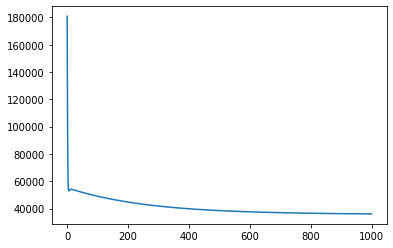

In [231]:
plt.plot(cost_array)

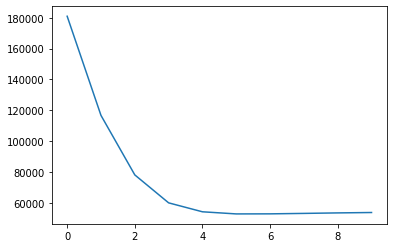

In [232]:
plt.plot(cost_array[:10])